# Flame Guard

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/df_for_comp/forestfires.csv'
dataset = pd.read_csv(file_path)
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
dataset.shape



(517, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
dataset.isna().sum()

,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0


In [8]:
dataset.duplicated().sum()

4

In [9]:
new_df =  dataset.drop_duplicates()

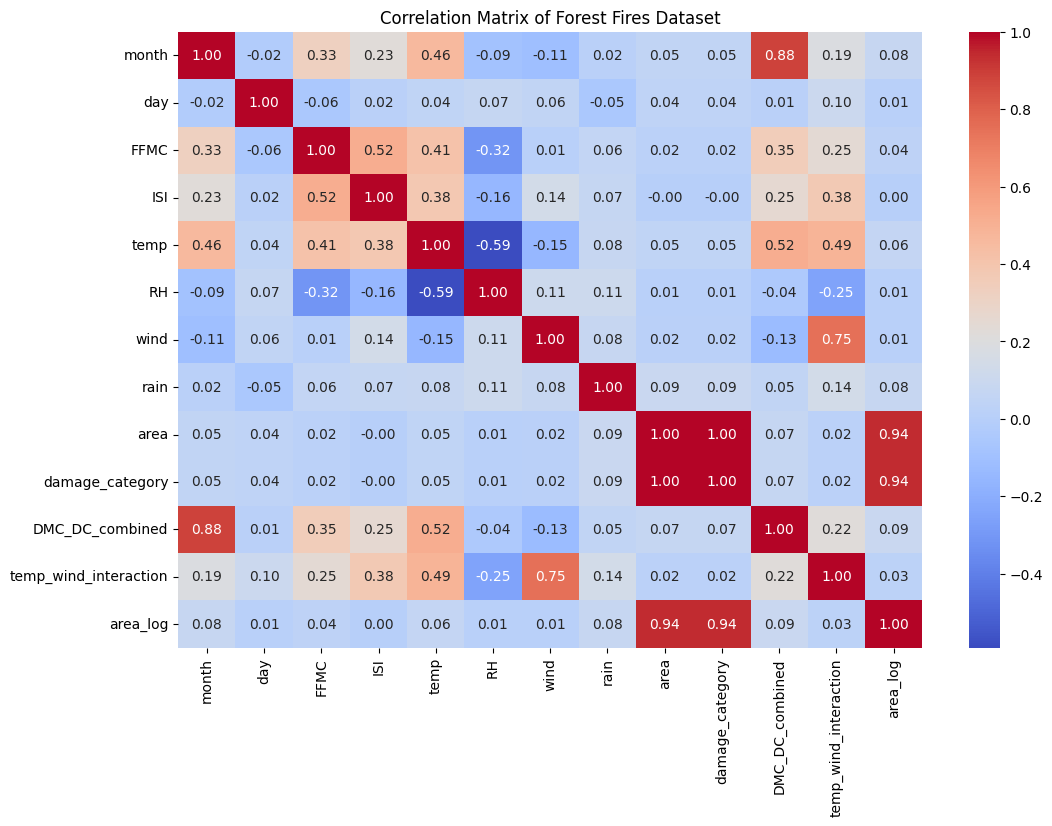

In [41]:
correlation_matrix = new_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Forest Fires Dataset')
plt.show()


# Exploratory Data Analysis

# Univariate Analysis

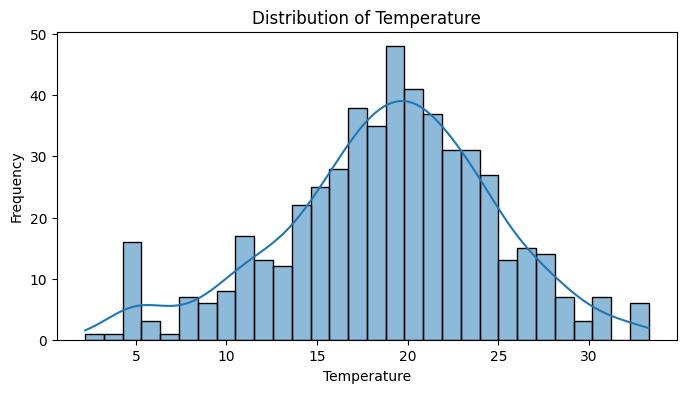

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(new_df['temp'], bins = 30, kde = True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()



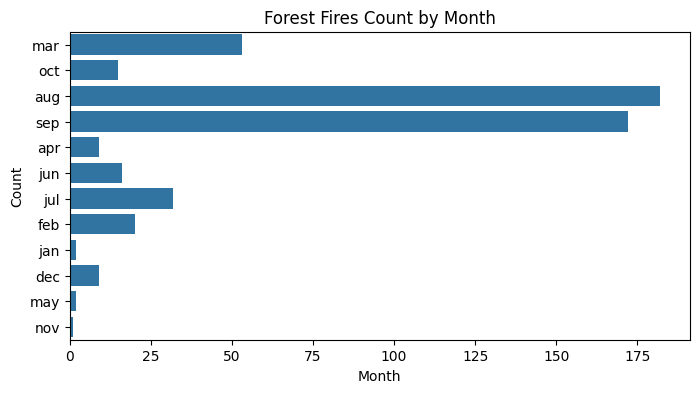

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(new_df['month'])
plt.title('Forest Fires Count by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

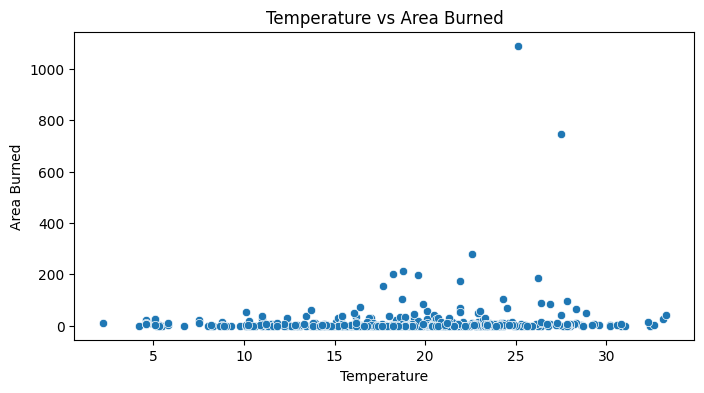

In [12]:

plt.figure(figsize=(8, 4))
sns.scatterplot(x=new_df['temp'], y=new_df['area'])
plt.title('Temperature vs Area Burned')
plt.xlabel('Temperature')
plt.ylabel('Area Burned')
plt.show()


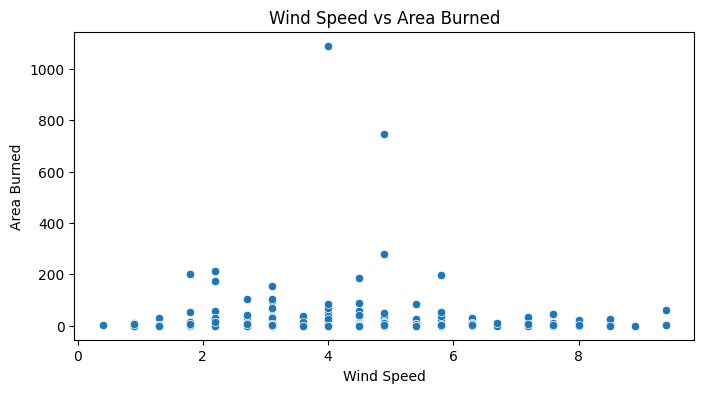

In [13]:
plt.figure(figsize = (8,4))
sns.scatterplot(x= new_df['wind'], y = new_df['area'])
plt.title('Wind Speed vs Area Burned')
plt.xlabel('Wind Speed')
plt.ylabel('Area Burned')
plt.show()

# Multivariate Analysis

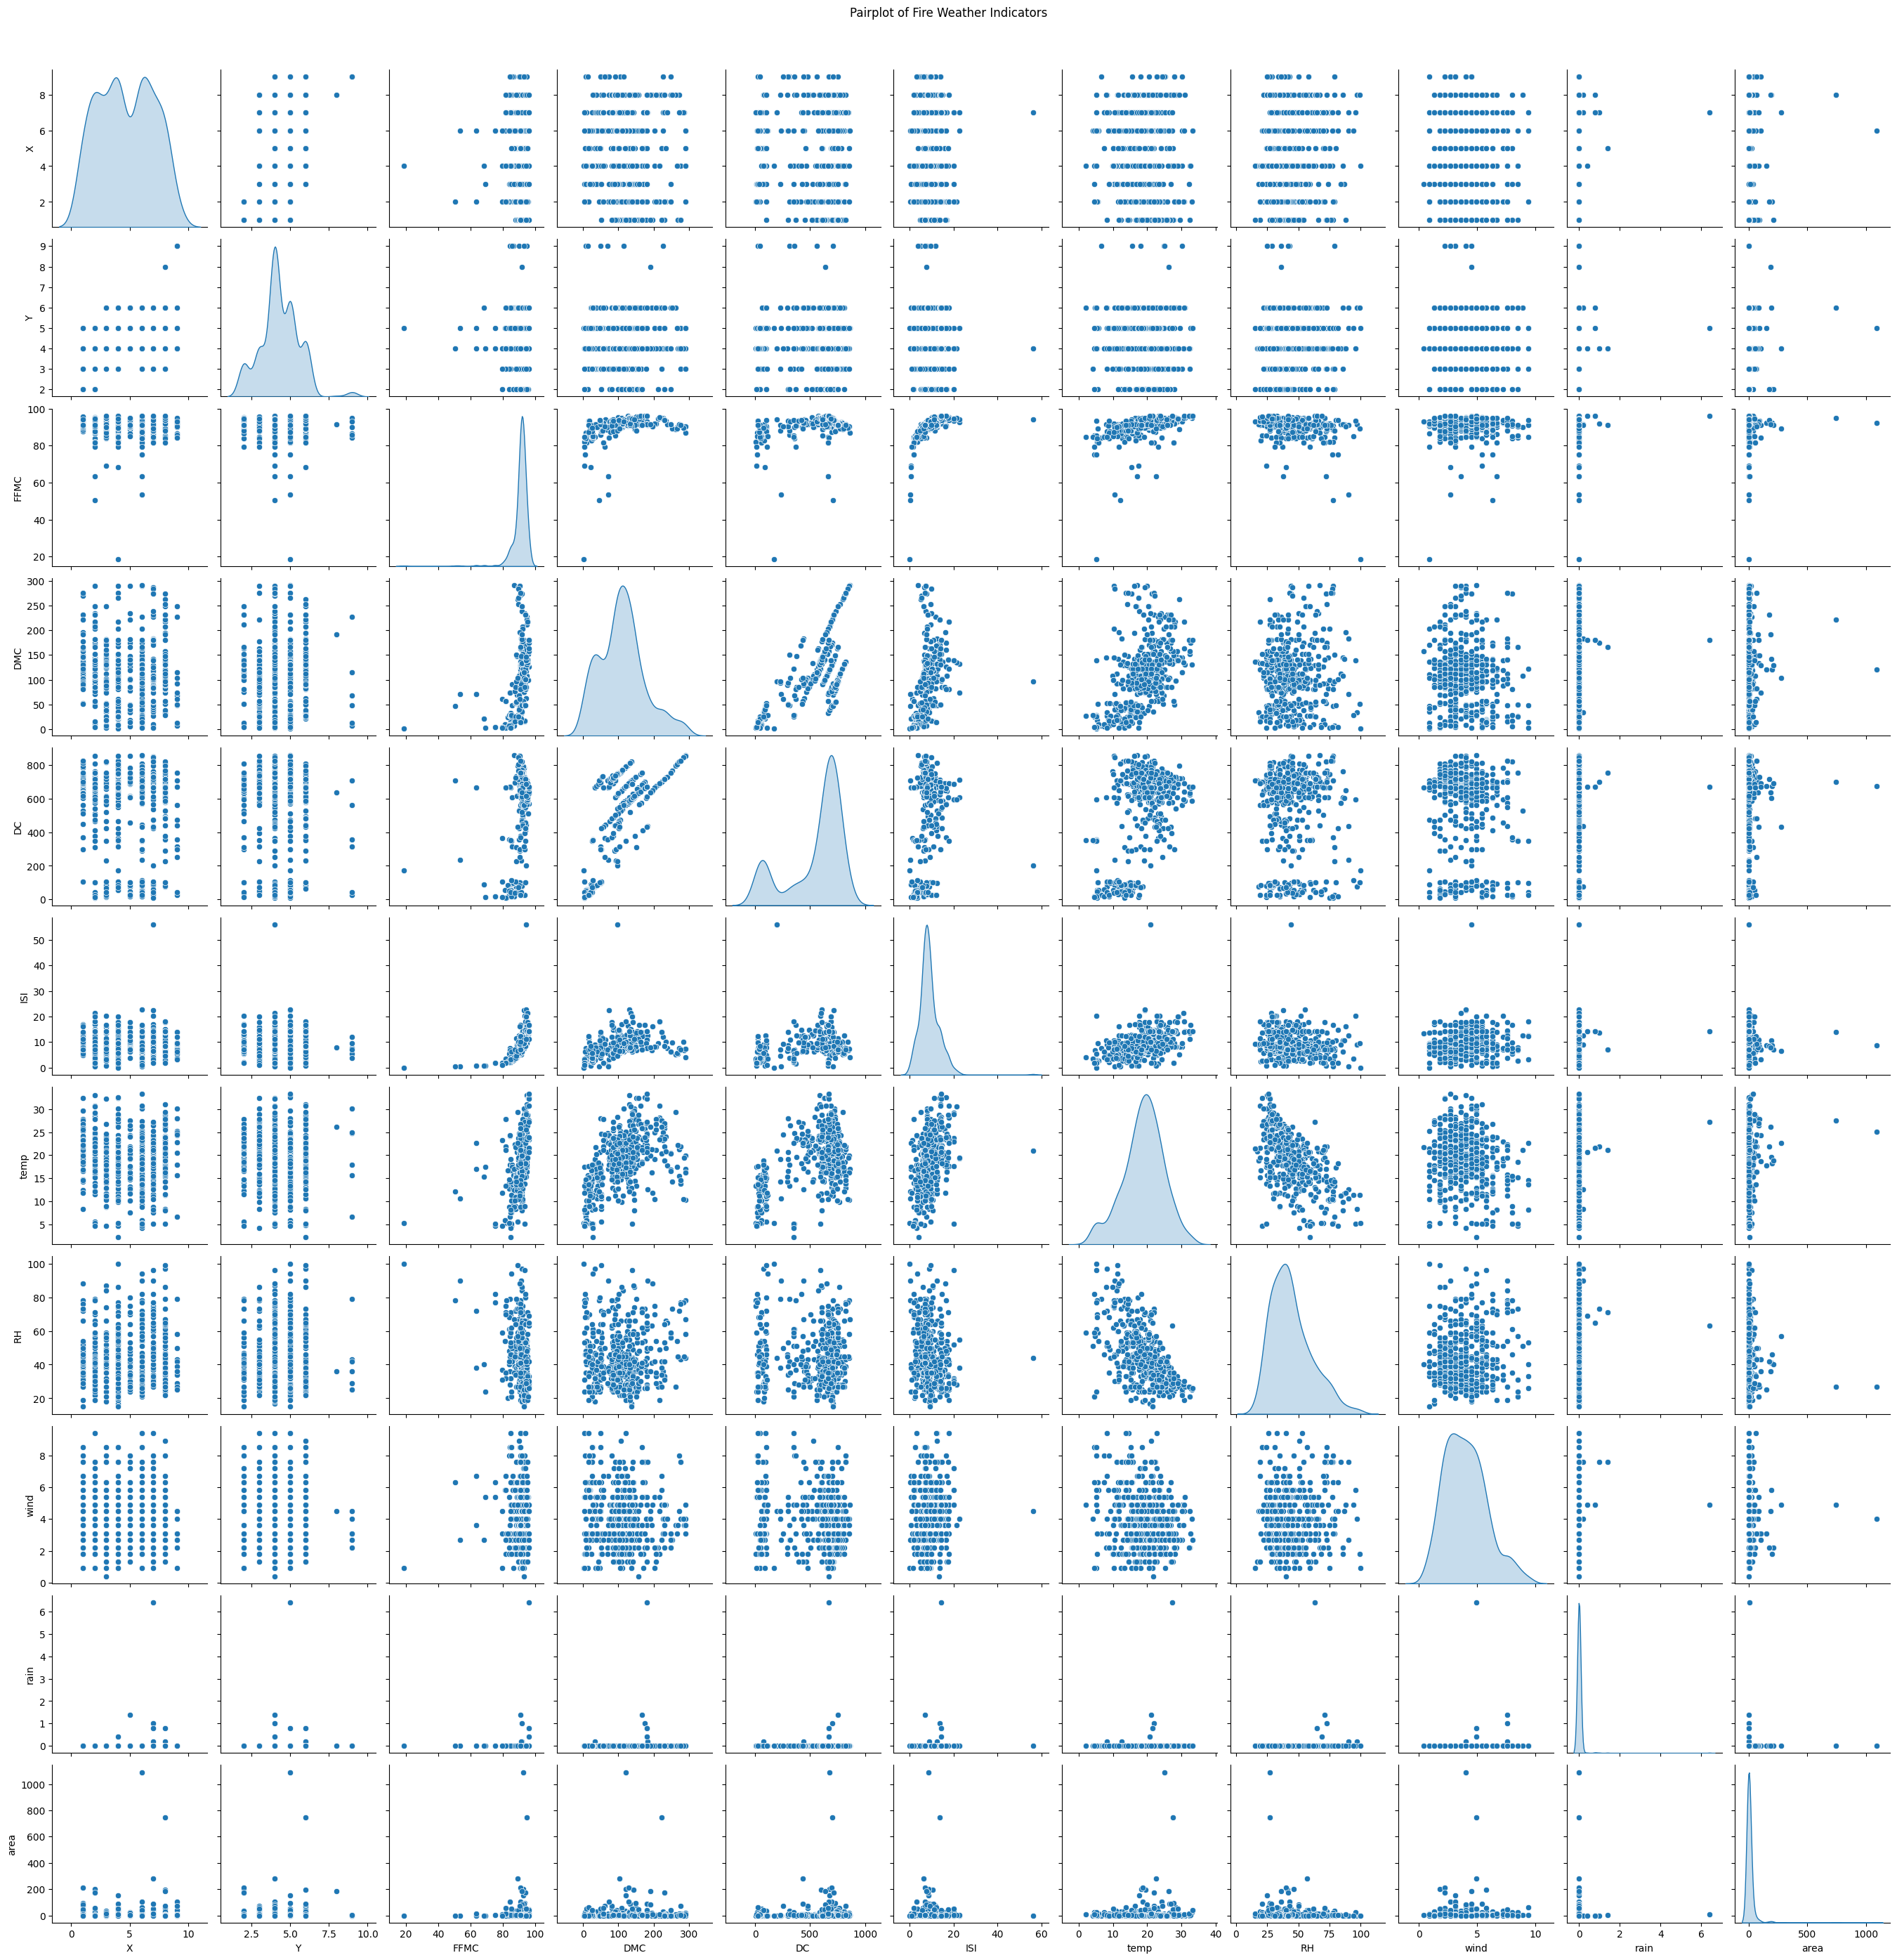

In [14]:
sns.pairplot(new_df, diag_kind= 'kde')
plt.suptitle('Pairplot of Fire Weather Indicators', y=1.02)
plt.show()

# Outliers

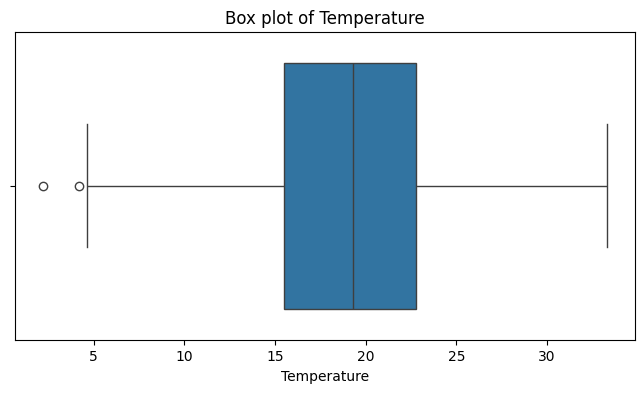

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x = new_df['temp'])
plt.title('Box plot of Temperature')
plt.xlabel('Temperature')
plt.show()

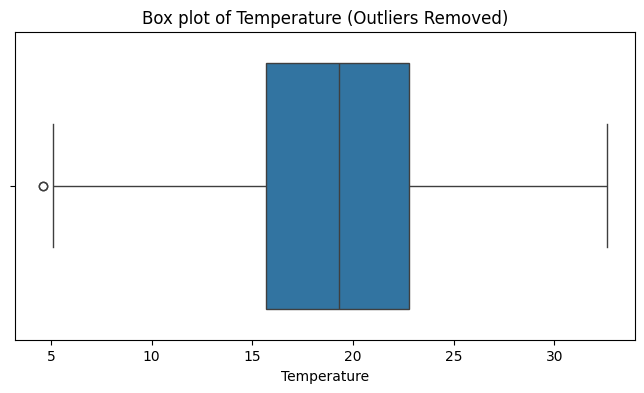

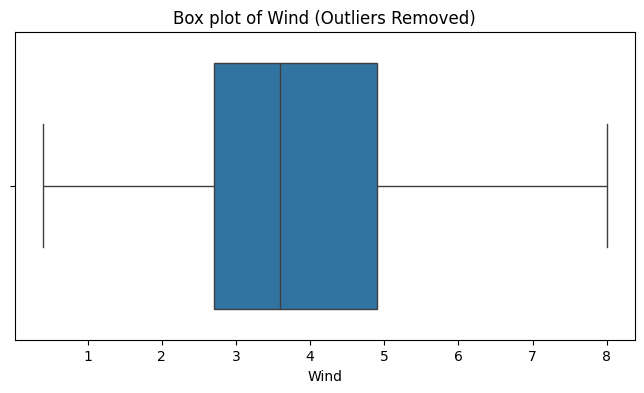

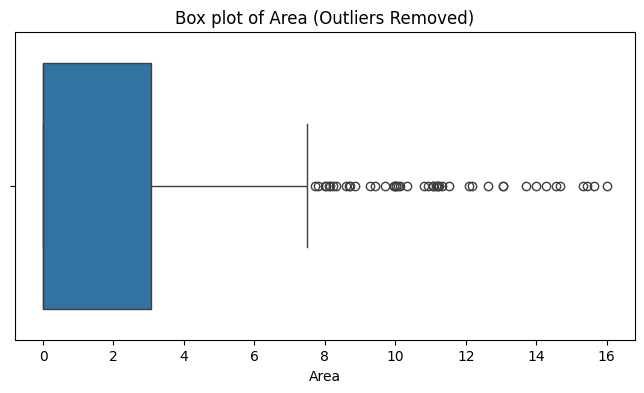

In [16]:

def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers


columns_to_check = ['temp', 'wind', 'area']
for column in columns_to_check:
  new_df = remove_outliers_iqr(new_df, column)


plt.figure(figsize=(8,4))
sns.boxplot(x = new_df['temp'])
plt.title('Box plot of Temperature (Outliers Removed)')
plt.xlabel('Temperature')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x = new_df['wind'])
plt.title('Box plot of Wind (Outliers Removed)')
plt.xlabel('Wind')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x = new_df['area'])
plt.title('Box plot of Area (Outliers Removed)')
plt.xlabel('Area')
plt.show()


In [18]:

new_df['damage_category'] = (new_df['area'] / new_df['area'].max())



In [19]:
new_df = new_df.drop(['X', 'Y'], axis=1)


In [20]:
new_df['DMC_DC_combined'] = new_df['DMC'] + new_df['DC']

In [21]:
new_df = new_df.drop(['DMC', 'DC'], axis=1)

In [22]:
new_df['temp_wind_interaction'] = new_df['temp'] * new_df['wind']

In [23]:
new_df['area_log'] = np.log1p(new_df['area'])

In [24]:
new_df.head()

,month,day,FFMC,ISI,temp,RH,wind,rain,area,damage_category,DMC_DC_combined,temp_wind_interaction,area_log
0,mar,fri,86.2,5.1,8.2,51,6.7,0.0,0.0,0.0,120.5,54.94,0.0
1,oct,tue,90.6,6.7,18.0,33,0.9,0.0,0.0,0.0,704.5,16.20,0.0
2,oct,sat,90.6,6.7,14.6,33,1.3,0.0,0.0,0.0,730.6,18.98,0.0
3,mar,fri,91.7,9.0,8.3,97,4.0,0.2,0.0,0.0,110.8,33.20,0.0
4,mar,sun,89.3,9.6,11.4,99,1.8,0.0,0.0,0.0,153.5,20.52,0.0


In [25]:
new_df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
new_df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [26]:

X = new_df.drop(['area', 'damage_category'], axis = 1)
y = new_df['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )


In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

results = {}

for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  results[model_name] = {"MSE": mse, "R-squared": r2}

results_df = pd.DataFrame(results).transpose()
print(results_df)





                             MSE  R-squared
Linear Regression       0.867974   0.867741
Decision Tree           0.048270   0.992645
Random Forest           0.005286   0.999194
Support Vector Machine  7.409675  -0.129062


In [28]:
y_pred_dt = models["Decision Tree"].predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
accuracy_dt = r2_dt * 100
print(f"Accuracy of Decision Tree: {accuracy_dt:.2f}%")


Accuracy of Decision Tree: 99.26%


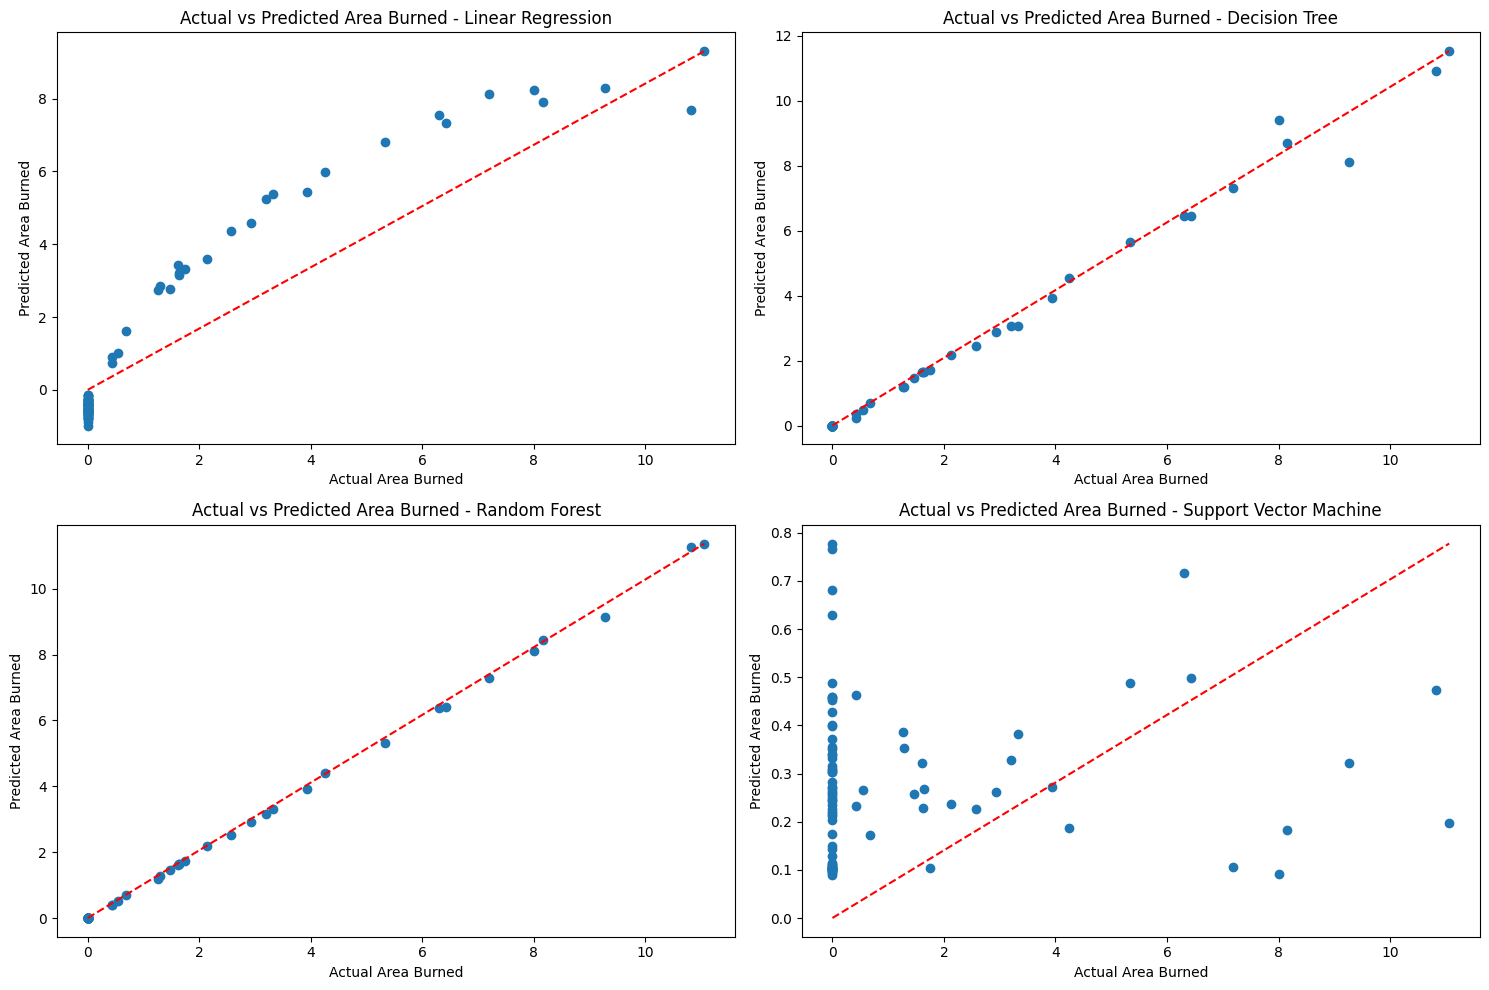

In [29]:
plt.figure(figsize=(15, 10))

for i, (model_name, model) in enumerate(models.items()):
  y_pred = model.predict(X_test)
  plt.subplot(2, 2, i + 1)
  plt.scatter(y_test, y_pred)
  plt.xlabel('Actual Area Burned')
  plt.ylabel('Predicted Area Burned')
  plt.title(f'Actual vs Predicted Area Burned - {model_name}')
  plt.plot([0, max(y_test)], [0, max(y_pred)], color='red', linestyle='--')

plt.tight_layout()
plt.show()


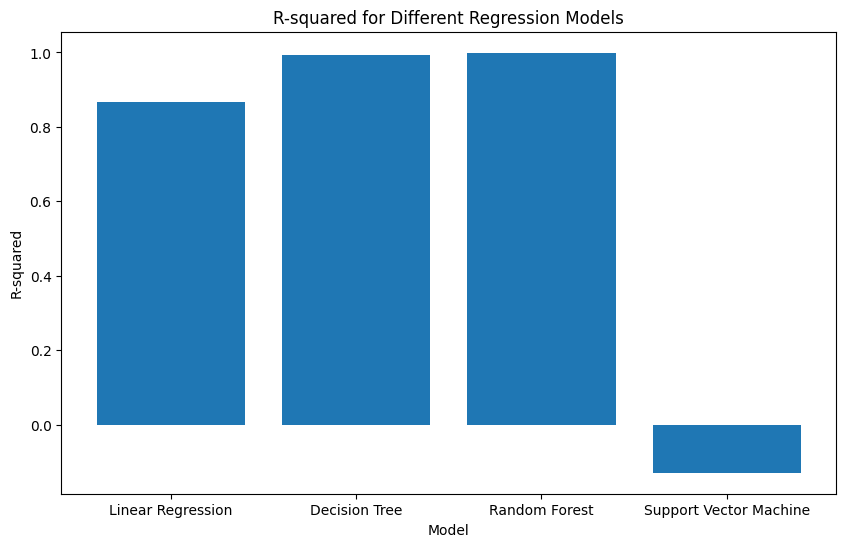

In [30]:
# Plotting R-squared for each model
plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df["R-squared"])
plt.xlabel("Model")
plt.ylabel("R-squared")
plt.title("R-squared for Different Regression Models")
plt.show()


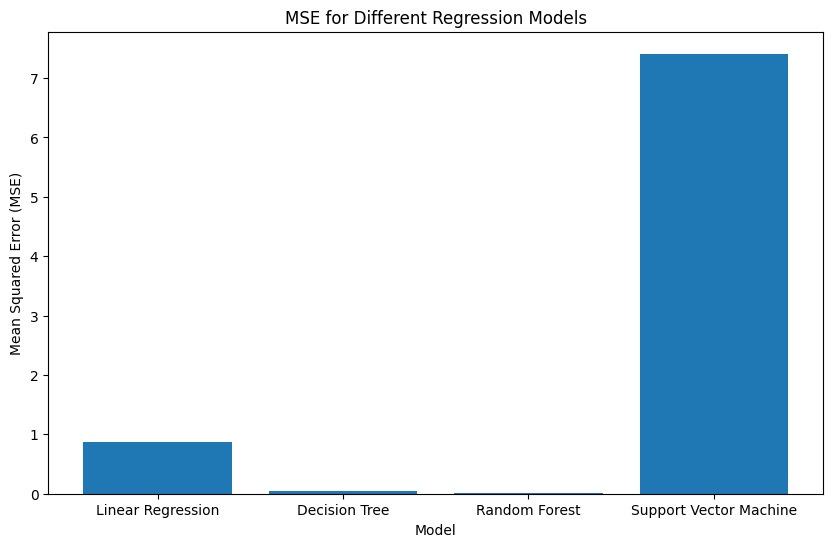

In [31]:
# Plotting MSE for each model
plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df["MSE"])
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Different Regression Models")
plt.show()


                        Training Accuracy  Testing Accuracy
Linear Regression               88.853991         86.774095
Decision Tree                  100.000000         99.770898
Random Forest                   99.985603         99.915631
Support Vector Machine         -32.494238        -12.906189


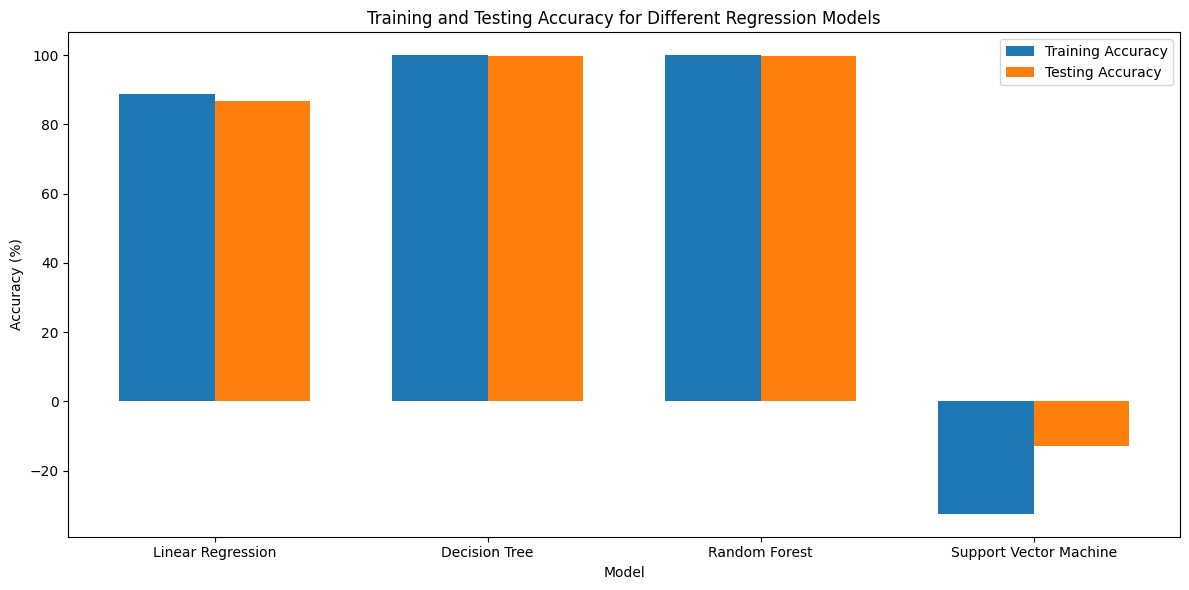

In [32]:
# prompt: get me the accuracy of all of them 4 models I'm using their accuracy on training data and testing data. both in graph and tabular form in percentage format and make the graph proper

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

results = {}

for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  train_r2 = r2_score(y_train, y_pred_train)
  test_r2 = r2_score(y_test, y_pred_test)

  results[model_name] = {"Training Accuracy": train_r2 * 100, "Testing Accuracy": test_r2 * 100}

# Displaying the results in a table format
results_df = pd.DataFrame(results).transpose()
print(results_df)


# Plotting Training and Testing Accuracy for each model
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(results_df.index))

plt.bar(index, results_df["Training Accuracy"], bar_width, label="Training Accuracy")
plt.bar(index + bar_width, results_df["Testing Accuracy"], bar_width, label="Testing Accuracy")

plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Training and Testing Accuracy for Different Regression Models")
plt.xticks(index + bar_width / 2, results_df.index)
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
113 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Tuned Model - Test R-squared: 0.9972751311470509
Tuned Model - Test MSE: 0.017882449494949507


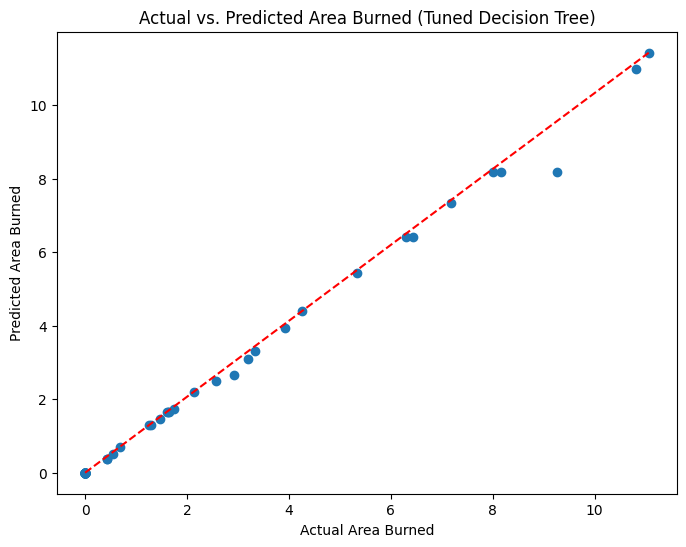

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['mse', 'friedman_mse', 'mae']
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)

test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Tuned Model - Test R-squared:", test_r2)
print("Tuned Model - Test MSE:", test_mse)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Area Burned")
plt.ylabel("Predicted Area Burned")
plt.title("Actual vs. Predicted Area Burned (Tuned Decision Tree)")
plt.plot([0, max(y_test)], [0, max(y_pred_test)], color='red', linestyle='--')
plt.show()


In [34]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')

print("Cross-Validation R-squared Scores:", cv_scores)

print("Mean R-squared:", cv_scores.mean())
print("Standard Deviation of R-squared:", cv_scores.std())


Cross-Validation R-squared Scores: [1.         0.99232072 0.99600134 0.99137958 0.99915958]
Mean R-squared: 0.9957722443047297
Standard Deviation of R-squared: 0.0034816345937477267


In [35]:
# Example of scaling (using StandardScaler):
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['temp', 'RH', 'wind', 'rain', 'DMC_DC_combined', 'temp_wind_interaction', 'area_log']
new_df[numerical_features] = scaler.fit_transform(new_df[numerical_features])

# Redefine X and y with the new features
X = new_df.drop(['area', 'damage_category'], axis=1)
y = new_df['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the model with the modified data
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("New Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared:", cv_scores.mean())
print("Standard Deviation of R-squared:", cv_scores.std())


New Cross-Validation R-squared Scores: [1.         0.99580711 0.99305617 0.99217392 0.99827152]
Mean R-squared: 0.9958617438831838
Standard Deviation of R-squared: 0.0029801490188021184


In [36]:

mean_r2 = cv_scores.mean()
std_r2 = cv_scores.std()

if mean_r2 > 0.7 and std_r2 < 0.1:
  print("The cross-validation results are good.")
else:
  print("The cross-validation results may not be optimal.")
  print("Consider further improvements to the model or data.")



The cross-validation results are good.


In [38]:
import pickle
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

y_pred_test_lr = model_lr.predict(X_test)

test_r2_lr = r2_score(y_test, y_pred_test_lr)
test_mse_lr = mean_squared_error(y_test, y_pred_test_lr)

print("Linear Regression - Test R-squared:", test_r2_lr)
print("Linear Regression - Test MSE:", test_mse_lr)

filename_lr = 'forest_fire_model_lr.pkl'
pickle.dump(model_lr, open(filename_lr, 'wb'))


Linear Regression - Test R-squared: 0.8677409540423477
Linear Regression - Test MSE: 0.8679741437934642


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle

X = new_df[['temp', 'wind', 'RH', 'month', 'day', 'FFMC', 'ISI', 'rain', 'DMC_DC_combined', 'temp_wind_interaction']]
y = new_df['area']

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

model_lr = LinearRegression()
model_lr.fit(X_scaled, y_scaled)

with open('forest_fire_model_lr.pkl', 'wb') as file:
    pickle.dump(model_lr, file)

with open('scaler_X.pkl', 'wb') as file:
    pickle.dump(scaler_X, file)

with open('scaler_y.pkl', 'wb') as file:
    pickle.dump(scaler_y, file)


In [40]:

import pickle
import numpy as np

model_lr = pickle.load(open('forest_fire_model_lr.pkl', 'rb'))
scaler_X = pickle.load(open('scaler_X.pkl', 'rb'))
scaler_y = pickle.load(open('scaler_y.pkl', 'rb'))

features = ['month', 'day', 'FFMC', 'ISI', 'rain', 'DMC_DC_combined', 'temp_wind_interaction']
mean_values = new_df[features].mean()

max_area = new_df['area'].max()

def predict_area_burned(temp, wind, RH, model):
    input_data = np.array([temp, wind, RH, *mean_values]).reshape(1, -1)
    input_data_scaled = scaler_X.transform(input_data)
    prediction_scaled = model.predict(input_data_scaled)
    prediction = scaler_y.inverse_transform(prediction_scaled.reshape(-1, 1)).ravel()
    normalized_prediction = prediction[0] / max_area
    normalized_prediction = np.clip(normalized_prediction, 0, 1)
    return round(normalized_prediction, 2)

temp = 0.1
wind = 0.4
RH = 10

print("Predictions with Changing Input Values:")
print("-" * 30)

for i in range(5):
    lr_prediction = predict_area_burned(temp, wind, RH, model_lr)
    print(f"Iteration {i+1}:")
    print(f"  Temperature: {temp:.1f}, Wind: {wind:.1f}, RH: {RH:.1f}")
    print(f"  Linear Regression Prediction (0-1 scale): {lr_prediction}")
    print("-" * 30)

    temp += 0.9
    wind += 0.5
    RH -= 5


Predictions with Changing Input Values:
------------------------------
Iteration 1:
  Temperature: 0.1, Wind: 0.4, RH: 10.0
  Linear Regression Prediction (0-1 scale): 0.18
------------------------------
Iteration 2:
  Temperature: 1.0, Wind: 0.9, RH: 5.0
  Linear Regression Prediction (0-1 scale): 0.26
------------------------------
Iteration 3:
  Temperature: 1.9, Wind: 1.4, RH: 0.0
  Linear Regression Prediction (0-1 scale): 0.34
------------------------------
Iteration 4:
  Temperature: 2.8, Wind: 1.9, RH: -5.0
  Linear Regression Prediction (0-1 scale): 0.41
------------------------------
Iteration 5:
  Temperature: 3.7, Wind: 2.4, RH: -10.0
  Linear Regression Prediction (0-1 scale): 0.49
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
